# Intro housing Prices Regression Model
This workbook is inspired by the work of [Ken Jee](https://github.com/PlayingNumbers) and steps generated by the [ChatGPT](https://openai.com/blog/chatgpt). 

This workbook **includes:**
* Understand the Data
    + Basic Data Cleaning,
    + Feature Exploration
    + Check missing values
* Exploratory Data Analysis (EDA):
    + Generate summary statistics for features
    + Check the data distributions by histogram plots & visualize features
    + Explore (if any) relationships/correlationships among features with target variables
    + Identify potential outliers
* Basic Data Engineering (creating a pipeline for train & test Data)
* Model Experimentation and parameter tuning (linear regression, Random Forests, XGBoost, MLP)
* Feature engineering
    + create/ remove features in accordance with relevency
* Ensembling
* Submission

In [2]:
# necessary Lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



## 1- Basic Data Exploration
* Import Data
* Summarize the Data and get summary statistics
* Evaluate Nulls

In [3]:
train_df = pd.read_csv("train.csv")
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_df.shape

(1460, 81)

In [5]:
# Numerical features
num_feat = train_df.select_dtypes(include = [np.number])
num_feat.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# Function creates large tables into scroable ones
from IPython.display import display, HTML
def create_scrollable_table(df, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height:200px; overflow:auto;">'
    html += df.to_html()
    html += '</div>'
    return html

# notebook credit: https://www.kaggle.com/code/kenjee/housing-prices-example-with-video-walkthrough

This consice the table, and make it more dynamic for effective viewing.

In [7]:
summary_stats =num_feat.describe().T
html_num = create_scrollable_table(summary_stats, "Numerical Features",
                                  "Summary Statistics for Numerical Variables")
display(HTML(html_num))

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [8]:
# summary statistics for categorical features
cat_feat = train_df.select_dtypes(include = [object])
cat_summ_stats = cat_feat.describe().T
html_cat = create_scrollable_table(cat_summ_stats, "Categorical Features",
                                  "Summary Statistics for Categorical Features")
display(HTML(html_cat))

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


After looking at the tables for both types, it revealed that there are certain numerical features which are categorical in nature, however, because of the data-type representation, they seemed a numerical features. Year feature is better to be taken as a categorical variable, b/c having it continous does not seem to be effectively working as the data is relitively short. Apart from it, there exist a significan portion of Null values among both types of features.

In [9]:
# null Values in the Dataset
null_values = train_df.isnull().sum()
html_null_values = create_scrollable_table(null_values.to_frame(), 
                                           'null_values', 'Null values in the dataset')

# percentage of Null values in each column
perc = ((train_df.isnull().sum())/len(train_df))*100
html_missing_percentage = create_scrollable_table(perc.to_frame(),'missing_percentage', 
                                                  'Percentage of missing values for each feature')

display(HTML(html_null_values + html_missing_percentage))

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
Street,0
Alley,1369
LotShape,0
LandContour,0
Utilities,0


It appeared there are 6 variables have missing percentage of data greater than 45%, in categorical features. This shows, either these features are not available in most of the property or there is any clerkial error.

In [10]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## 2- Exploratory Data Analysis

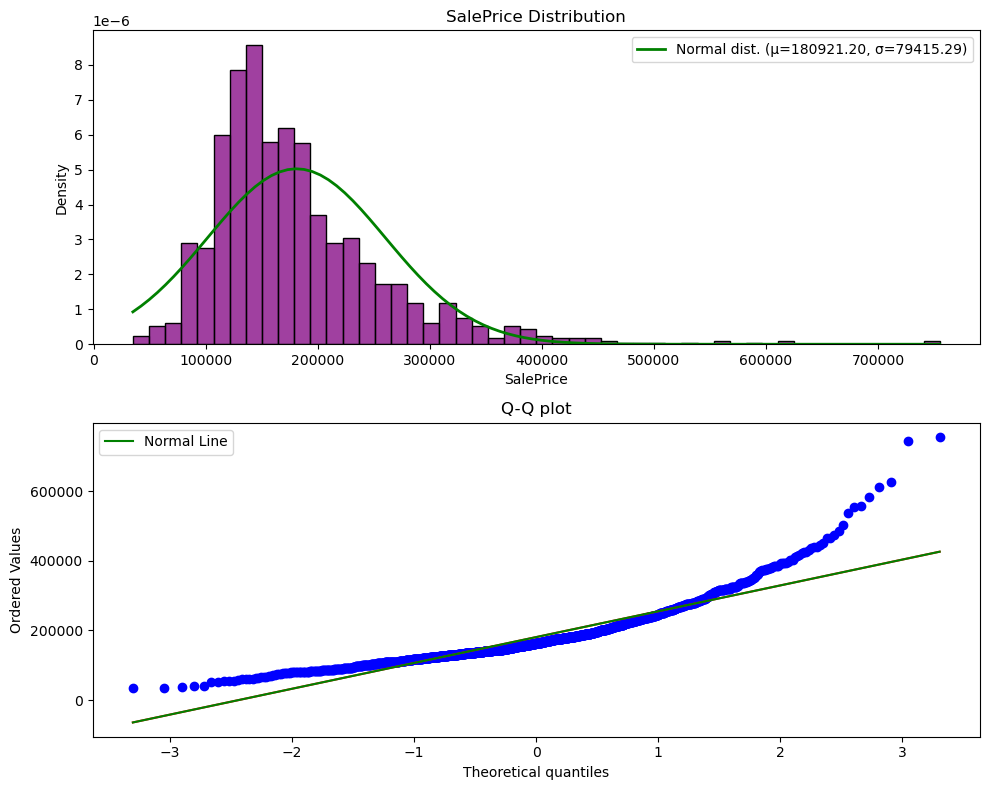

In [11]:
# Exploring the dependent variable - should we Normalize it? Results after Normalization

import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Fit a normal distribution to the SalePrice data
mu, sigma = stats.norm.fit(train_df['SalePrice'])

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Plot the histogram with the normal distribution overlay on the first subplot
sns.histplot(train_df['SalePrice'], kde=False, bins=50, ax=ax1, color='purple', stat="density")
x_norm = np.linspace(train_df['SalePrice'].min(), train_df['SalePrice'].max(), 100)
pdf = stats.norm.pdf(x_norm, mu, sigma)
ax1.plot(x_norm, pdf, 'g', linewidth=2, label=f"Normal dist. (μ={mu:.2f}, σ={sigma:.2f})")
ax1.set_title("SalePrice Distribution")
ax1.set_xlabel("SalePrice")
ax1.set_ylabel("Density")
ax1.legend()

# Create a Q-Q plot on the second subplot
res = stats.probplot(train_df['SalePrice'], plot=ax2)
slope, intercept, r_value, p_value, std_err = stats.linregress(res[0][0], res[0][1])
line_x = np.array(res[0][0])
line_y = intercept + slope * line_x
ax2.plot(line_x, line_y, 'g', label="Normal Line")
ax2.set_title("Q-Q plot")
ax2.legend()

plt.tight_layout()
plt.show()


# notebook credit: https://www.kaggle.com/code/serigne/stacked-regressions-top-4-on-leaderboard

These plots were generated with a code from GPT-4. However, this reveals that there is right-skew associated with the housing prices, and its important to use  log transformation to smooth out the data.

The reason why it's important to look at a Q-Q plot in many analyses is that certain statistical tests (like t-tests, ANOVA, linear regression, etc.) assume that the data are normally distributed. If this assumption is not met, the results of these tests may not be valid.

### What Qs do we ask of the data?

* How the property sale price affected by the zoning and building type?
* What type of houses are in this datasets (their characterstics)? - ChatGPT
* What is the avg selling price of the property by shape? - KenJee
* Analyze Property priceby Age and Living Area.
* Does price change year to year? - KenJee
* What model is most appropriate for the predicting House prices based on the data?

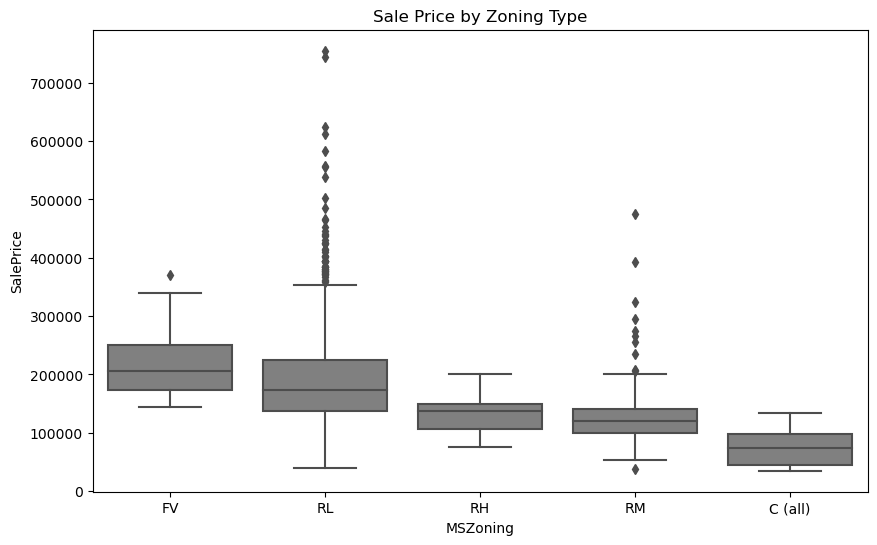

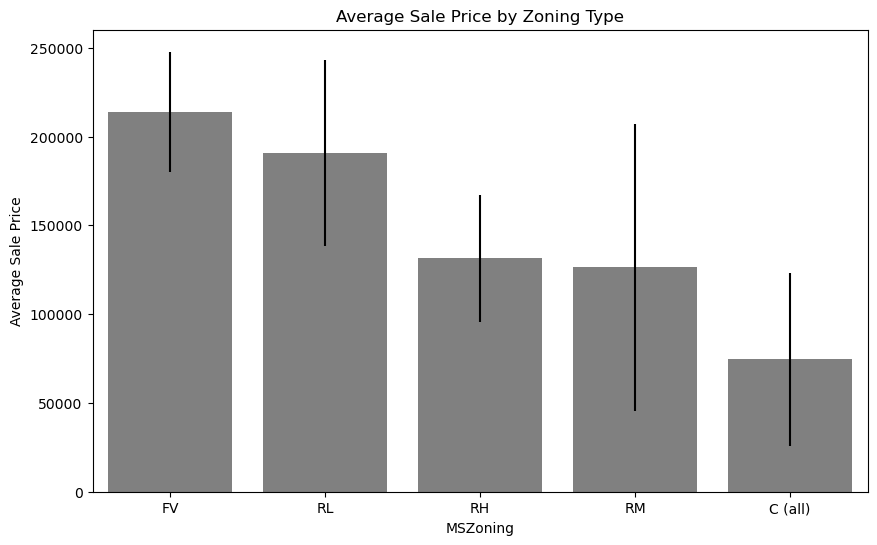

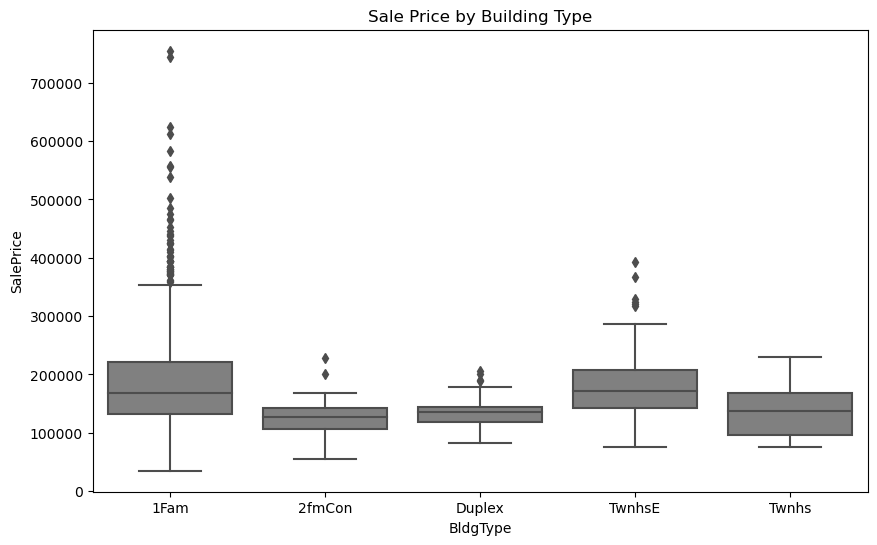

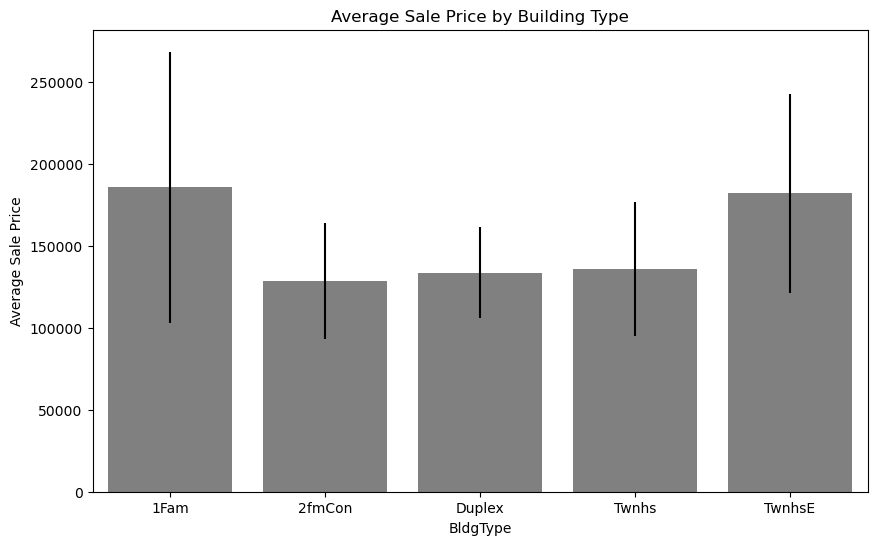

In [13]:
# How the property sale price affected by the zoning and building type?

# Calculate average and standard deviation for each zoning type
zoning_avg = train_df.groupby('MSZoning')['SalePrice'].mean()
zoning_std = train_df.groupby('MSZoning')['SalePrice'].std()

# Define the order
order = zoning_avg.sort_values(ascending=False).index

# Boxplot for the sale price across different zoning types
plt.figure(figsize=(10, 6))
sns.boxplot(x='MSZoning', y='SalePrice', data=train_df, order = order, color = "grey")
plt.title('Sale Price by Zoning Type')
plt.show()

# Create barplot for zoning
plt.figure(figsize=(10, 6))
sns.barplot(x=zoning_avg.index, y=zoning_avg.values, yerr=zoning_std.values,
            order = order, color = "grey")
plt.title('Average Sale Price by Zoning Type')
plt.ylabel('Average Sale Price')
plt.show()




# Boxplot for the sale price across different building types
plt.figure(figsize=(10, 6))
sns.boxplot(x='BldgType', y='SalePrice', data=train_df, color = "grey")
plt.title('Sale Price by Building Type')
plt.show()

# Calculate average and standard deviation for each building type
building_avg = train_df.groupby('BldgType')['SalePrice'].mean()
building_std = train_df.groupby('BldgType')['SalePrice'].std()

# Create barplot for building type
plt.figure(figsize=(10, 6))
sns.barplot(x=building_avg.index, y=building_avg.values, 
            yerr=building_std.values, color = "grey")
plt.title('Average Sale Price by Building Type')
plt.ylabel('Average Sale Price')
plt.show()

In accordance with zonning, FV has a higher avg selling price and a single detached family home and a Town House End has almost similar median selling price. Besides, among Town houses, the End has a significant premium over the Inside type of Town house. 

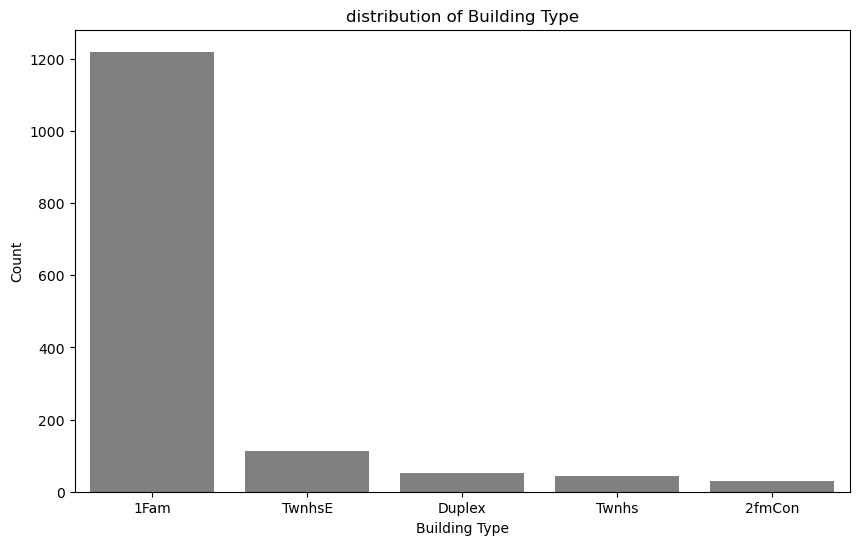

   BldgType HouseStyle      SalePrice
0      1Fam     1.5Fin  143726.957746
1      1Fam     1.5Unf  109546.153846
2      1Fam     1Story  175413.097199
3      1Fam     2.5Fin  222857.142857
4      1Fam     2.5Unf  163888.888889
5      1Fam     2Story  226940.185083
6      1Fam     SFoyer  147810.000000
7      1Fam       SLvl  169653.666667
8    2fmCon     1.5Fin  132106.250000
9    2fmCon     1.5Unf  118000.000000
10   2fmCon     1Story  135500.000000
11   2fmCon     2.5Fin  200000.000000
12   2fmCon     2.5Unf  127950.000000
13   2fmCon     2Story  114740.909091
14   2fmCon       SLvl  140000.000000
15   Duplex     1.5Fin  143475.000000
16   Duplex     1Story  125669.896552
17   Duplex     2Story  147083.666667
18   Duplex     SFoyer  141061.777778
19   Duplex       SLvl  132500.000000
20    Twnhs     1Story  201400.000000
21    Twnhs     2Story  133415.151515
22    Twnhs     SFoyer   85875.000000
23    Twnhs       SLvl   91000.000000
24   TwnhsE     1Story  201151.025641
25   TwnhsE 

In [15]:
# What type of houses are in this datasets (their characterstics)? - ChatGPT

# Create barplot for building type - count
dwelling_types = train_df['BldgType'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=dwelling_types.index, y=dwelling_types.values, color = "grey")
plt.title('distribution of Building Type')
plt.ylabel('Count')
plt.xlabel("Building Type")
plt.show()

# grouping by multiple features
grouped_multiple = train_df.groupby(['BldgType', 'HouseStyle'])['SalePrice'].mean().reset_index()
print(grouped_multiple)

In [16]:
grouped_multiple = train_df.groupby(['BldgType', 'HouseStyle'])
mean_prices = grouped_multiple['SalePrice'].mean()
counts = grouped_multiple.size()

# Create a new DataFrame from the groupby results
result = pd.DataFrame({'MeanPrice': mean_prices, 'Count': counts}).reset_index()

# Format MeanPrice as currency
result['MeanPrice'] = result['MeanPrice'].apply(lambda x: "${:,.2f}".format(x))

print(result)

   BldgType HouseStyle    MeanPrice  Count
0      1Fam     1.5Fin  $143,726.96    142
1      1Fam     1.5Unf  $109,546.15     13
2      1Fam     1Story  $175,413.10    607
3      1Fam     2.5Fin  $222,857.14      7
4      1Fam     2.5Unf  $163,888.89      9
5      1Fam     2Story  $226,940.19    362
6      1Fam     SFoyer  $147,810.00     20
7      1Fam       SLvl  $169,653.67     60
8    2fmCon     1.5Fin  $132,106.25      8
9    2fmCon     1.5Unf  $118,000.00      1
10   2fmCon     1Story  $135,500.00      7
11   2fmCon     2.5Fin  $200,000.00      1
12   2fmCon     2.5Unf  $127,950.00      2
13   2fmCon     2Story  $114,740.91     11
14   2fmCon       SLvl  $140,000.00      1
15   Duplex     1.5Fin  $143,475.00      4
16   Duplex     1Story  $125,669.90     29
17   Duplex     2Story  $147,083.67      9
18   Duplex     SFoyer  $141,061.78      9
19   Duplex       SLvl  $132,500.00      1
20    Twnhs     1Story  $201,400.00      5
21    Twnhs     2Story  $133,415.15     33
22    Twnhs

The Correlation b/w Property age and Sale Price of Property is -0.5233504175468159


<Figure size 1000x600 with 0 Axes>

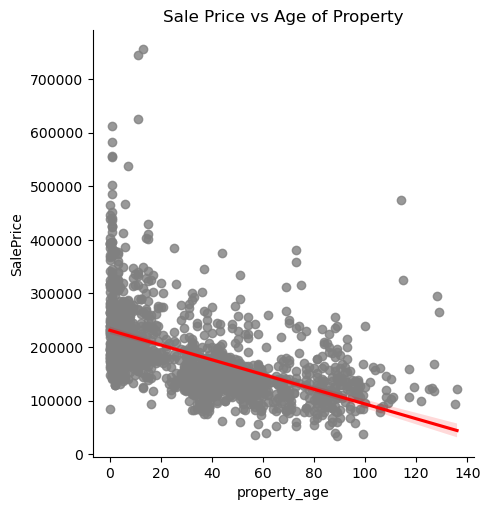


Correlation between Living Area (above grade) and Sale Price: 0.7086244776126521


<Figure size 1000x600 with 0 Axes>

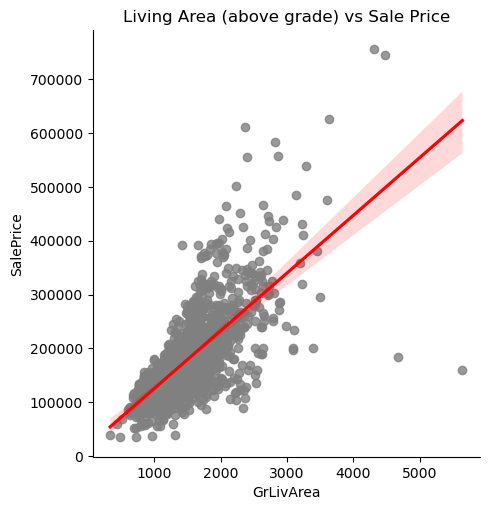

In [17]:
# Analyzing the property by age
train_df["property_age"] = train_df["YrSold"] - train_df["YearBuilt"]

# calculate the Correlation b/w sale price and property age
age_corr = train_df["property_age"].corr(train_df["SalePrice"])
print(f"The Correlation b/w Property age and Sale Price of Property is {age_corr}")

# plot the scatter-plot
plt.figure(figsize=(10, 6))
sns.lmplot(data=train_df, x='property_age', y='SalePrice',
          scatter_kws={'color': 'grey'}, line_kws={'color': 'red'})
plt.title('Sale Price vs Age of Property')
plt.show()

print(

)
# With Living Area
living_area_price_corr = train_df['GrLivArea'].corr(train_df['SalePrice'])
print(f'Correlation between Living Area (above grade) and Sale Price: {living_area_price_corr}')

# Create a scatter plot to visualize the relationship between Living Area and Sale Price
plt.figure(figsize=(10, 6))
sns.lmplot(data=train_df, x='GrLivArea', y='SalePrice',
          scatter_kws={'color': 'grey'}, line_kws={'color': 'red'})
plt.title('Living Area (above grade) vs Sale Price')
plt.show()

It appeard that the age is significantly negatively correlated to the Sale price of the property. This can be seen in the scatter plot, apart from few outliers, the trend is highly negative.

in contrast, the living area is highly correlated with the sale price of the property. This can also be seen with the quite steepe trend line.

YrSold
2006    163995.0
2007    167000.0
2008    164000.0
2009    162000.0
2010    155000.0
Name: SalePrice, dtype: float64


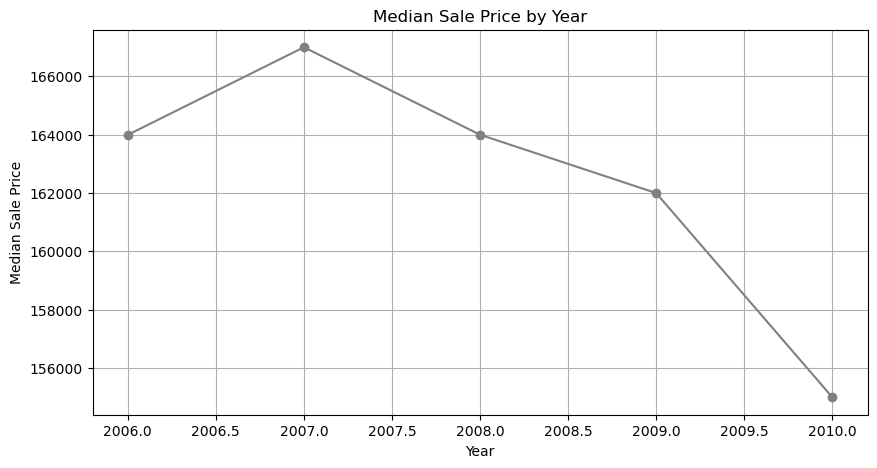

In [18]:
# Does price change year to year? - KenJee

# First, group the data by the 'YearSold' column and calculate the median price for each year
yearly_price = train_df.groupby('YrSold')['SalePrice'].median()

print(yearly_price)

# Plot the yearly median price
plt.figure(figsize=(10, 5))
plt.plot(yearly_price.index, yearly_price.values, marker='o', color = "grey")
plt.xlabel('Year')
plt.ylabel('Median Sale Price')
plt.title('Median Sale Price by Year')
plt.grid(True)
plt.show()

There is an upward trend initially, followed by a downward trend dur to housing crisis during 2008. Thus the median Sale price drops significantly due to recession.

## 3- Creating a Data Pipeline
This is important to clean up the data and use it in a model. We potentially want to normalize the data, based on the models we want to use. Also, this is important since we want to impute some data for Null values and scale few features.

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# Define transformers for numerical and categorical columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse = False))
])

# notebook credit: https://www.kaggle.com/code/kenjee/housing-prices-example-with-video-walkthrough

These pipelines helps to streamline the routine process the data, providing organized way for data pre-processing and ensuring that they execute in a correct order. In order to keep things simple, two saperate pipelines setup for numerical and categorical features. This way, I can impute the data for Null values, scale the data in accordance with the model used and eventually onehot code the data to justify categorical variables.
* For Numerical features, Imputing with Average (mean)
* For categorical features, Imputing with constants,
* Create dummy variables through one-hot code.

In [20]:
# Update categorical and numerical columns
cat_features = train_df.select_dtypes(include=['object', 'category']).columns
num_features = train_df.select_dtypes(include=['int64', 'float64']).columns

# Remove target variable from numerical columns
num_features = num_features.drop('SalePrice')

# Combine transformers using ColumnTransformer - this allows to choose which transformer applies to which type of column and returns the whole data, not just specific columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ],remainder = 'passthrough')

# Create a pipeline with the preprocessor - this additional pipeline helps to generalize the pre-process and lets several model used the data, instead of just going for a singly model.
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)])

# Apply the pipeline to your dataset
X = train_df.drop('SalePrice', axis=1)
y = np.log(train_df['SalePrice']) #normalize dependent variable 
X_preprocessed = pipeline.fit_transform(X)

# notebook credit: https://www.kaggle.com/code/kenjee/housing-prices-example-with-video-walkthrough

c:\miniconda_py3.9\envs\books\Lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Finally transform X through pre-processed pipeline. This makes data for Analysis clean.

## 4- Parameter Tuning and Fitting Model
Performing 3 fold Validation to check the performance of the each model. This is important to tune the parameters of the model and check the performance of the model. 

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Define the models
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Define the hyperparameter grids for each model
param_grids = {
    'LinearRegression': {},
    'RandomForest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 10, 30],
        'min_samples_split': [2, 5, 10],
    },
    'XGBoost': {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 6, 10],
    }
}

# 3-fold cross-validation
cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Train and tune the models
grids = {}
for model_name, model in models.items():
    print(f'Training and tuning {model_name}...')
    grids[model_name] = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
    grids[model_name].fit(X_train, y_train)
    best_params = grids[model_name].best_params_
    best_score = np.sqrt(-1 * grids[model_name].best_score_)
    
    print(f'Best parameters for {model_name}: {best_params}')
    print(f'Best RMSE for {model_name}: {best_score}\n')

# notebook credit: https://www.kaggle.com/code/kenjee/housing-prices-example-with-video-walkthrough

Training and tuning LinearRegression...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters for LinearRegression: {}
Best RMSE for LinearRegression: 2104234026.9406564

Training and tuning RandomForest...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for RandomForest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 500}
Best RMSE for RandomForest: 0.15350668386347957

Training and tuning XGBoost...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
Best RMSE for XGBoost: 0.13109727371658017



It appeared that XG Boost gives out the lowest RMSE. however, LR results are horrible and a certain explaination is multicolinearity. Since, the no of features is large, it is importan to reduce the dimensionality of the data, and to this end PCA is the way to go.

In [22]:
# Applying Neural Net

from sklearn.neural_network import MLPRegressor

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Create an MLPRegressor instance
mlp = MLPRegressor(random_state=42,max_iter=10000, n_iter_no_change = 3,learning_rate_init=0.001)

# Define the parameter grid for tuning
param_grid = {
    'hidden_layer_sizes': [(10,), (10,10), (10,10,10), (25)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
}

# Create the GridSearchCV object
grid_search_mlp = GridSearchCV(mlp, param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=1)

# Fit the model on the training data
grid_search_mlp.fit(X_train_scaled, y_train)

# Print the best parameters found during the search
print("Best parameters found: ", grid_search_mlp.best_params_)

# Evaluate the model on the test data
best_score = np.sqrt(-1 * grid_search_mlp.best_score_)
print("Test score: ", best_score)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best parameters found:  {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10), 'learning_rate': 'constant', 'solver': 'adam'}
Test score:  0.23248885526714722


### PCA
Basic Feature Engineering

In [23]:
#pca
from sklearn.decomposition import PCA

pca = PCA()
X_pca_pre = pca.fit_transform(X_preprocessed)

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Choose the number of components based on the explained variance threshold
n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1

pca = PCA(n_components=n_components)
pipeline_pca = Pipeline(steps=
                        [('preprocessor', preprocessor),
                        ('pca', pca)])

X_pca = pipeline_pca.fit_transform(X)

c:\miniconda_py3.9\envs\books\Lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Re-runnig the LR, RF & XGB

In [24]:
# Split the data into training and testing sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Define the models
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Define the hyperparameter grids for each model
param_grids = {
    'LinearRegression': {},
    'RandomForest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 10, 30],
        'min_samples_split': [2, 5, 10],
    },
    'XGBoost': {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 6, 10],
    }
}

# 3-fold cross-validation
cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Train and tune the models
grids_pca = {}
for model_name, model in models.items():
    print(f'Training and tuning {model_name}...')
    grids_pca[model_name] = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
    grids_pca[model_name].fit(X_train_pca, y_train_pca)
    best_params = grids_pca[model_name].best_params_
    best_score = np.sqrt(-1 * grids_pca[model_name].best_score_)
    
    print(f'Best parameters for {model_name}: {best_params}')
    print(f'Best RMSE for {model_name}: {best_score}\n')

Training and tuning LinearRegression...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters for LinearRegression: {}
Best RMSE for LinearRegression: 0.1630688238997376

Training and tuning RandomForest...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for RandomForest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}
Best RMSE for RandomForest: 0.15251739990991703

Training and tuning XGBoost...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
Best RMSE for XGBoost: 0.13639310150456585



This helps immensly improves the linear Regression RMSe, as it removes the problem of multicolinearity. However, the other 2 methods shows a slight degrade in the results.

In [25]:
# Applying Neural Net

X_train_scaled_pca = X_train_pca.copy()
X_test_scaled_pca = X_test_pca.copy()

# Create an MLPRegressor instance
mlp = MLPRegressor(random_state=42,max_iter=10000, n_iter_no_change = 3,learning_rate_init=0.001)

# Define the parameter grid for tuning
param_grid = {
    'hidden_layer_sizes': [(10,), (10,10), (10,10,10), (25)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
}

# Create the GridSearchCV object
grid_search_mlp_pca = GridSearchCV(mlp, param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=1)

# Fit the model on the training data
grid_search_mlp_pca.fit(X_train_scaled_pca, y_train)

# Print the best parameters found during the search
print("Best parameters found: ", grid_search_mlp_pca.best_params_)

# Evaluate the model on the test data
best_score = np.sqrt(-1 * grid_search_mlp_pca.best_score_)
print("Test score: ", best_score)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best parameters found:  {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (10, 10), 'learning_rate': 'constant', 'solver': 'adam'}
Test score:  0.5962873651464246


Slight worst results in NN

In [26]:
from sklearn.metrics import mean_squared_error
for i in grids.keys():
    print (i + ': ' + str(np.sqrt(mean_squared_error(grids[i].predict(X_test), y_test))))

#print("NN: ", str(np.sqrt(mean_squared_error(grid_search_mlp_pca.predict(X_test_scaled),y_test))))                          

LinearRegression: 1535582421.1255102
RandomForest: 0.14695707764366517
XGBoost: 0.14400935453137018


## 6- Feature Engineering

In [27]:
var_explore = train_df[['Fence','Alley','MiscFeature','PoolQC','FireplaceQu','GarageCond','GarageQual','GarageFinish','GarageType','BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual','MasVnrType','Electrical','MSZoning','Utilities','Exterior1st','Exterior2nd','KitchenQual','Functional','SaleType','LotFrontage','GarageYrBlt','MasVnrArea','BsmtFullBath','BsmtHalfBath','GarageCars','GarageArea','TotalBsmtSF']]

display(HTML(create_scrollable_table(var_explore, 'var_explore', 'List of Variables to Explore for Feature Engineering')))

,Fence,Alley,MiscFeature,PoolQC,FireplaceQu,GarageCond,GarageQual,GarageFinish,GarageType,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual,MasVnrType,Electrical,MSZoning,Utilities,Exterior1st,Exterior2nd,KitchenQual,Functional,SaleType,LotFrontage,GarageYrBlt,MasVnrArea,BsmtFullBath,BsmtHalfBath,GarageCars,GarageArea,TotalBsmtSF
0,NaN,NaN,NaN,NaN,NaN,TA,TA,RFn,Attchd,No,Unf,GLQ,TA,Gd,BrkFace,SBrkr,RL,AllPub,VinylSd,VinylSd,Gd,Typ,WD,65.0,2003.0,196.0,1,0,2,548,856
1,NaN,NaN,NaN,NaN,TA,TA,TA,RFn,Attchd,Gd,Unf,ALQ,TA,Gd,None,SBrkr,RL,AllPub,MetalSd,MetalSd,TA,Typ,WD,80.0,1976.0,0.0,0,1,2,460,1262
2,NaN,NaN,NaN,NaN,TA,TA,TA,RFn,Attchd,Mn,Unf,GLQ,TA,Gd,BrkFace,SBrkr,RL,AllPub,VinylSd,VinylSd,Gd,Typ,WD,68.0,2001.0,162.0,1,0,2,608,920
3,NaN,NaN,NaN,NaN,Gd,TA,TA,Unf,Detchd,No,Unf,ALQ,Gd,TA,None,SBrkr,RL,AllPub,Wd Sdng,Wd Shng,Gd,Typ,WD,60.0,1998.0,0.0,1,0,3,642,756
4,NaN,NaN,NaN,NaN,TA,TA,TA,RFn,Attchd,Av,Unf,GLQ,TA,Gd,BrkFace,SBrkr,RL,AllPub,VinylSd,VinylSd,Gd,Typ,WD,84.0,2000.0,350.0,1,0,3,836,1145
5,MnPrv,NaN,Shed,NaN,NaN,TA,TA,Unf,Attchd,No,Unf,GLQ,TA,Gd,None,SBrkr,RL,AllPub,VinylSd,VinylSd,TA,Typ,WD,85.0,1993.0,0.0,1,0,2,480,796
6,NaN,NaN,NaN,NaN,Gd,TA,TA,RFn,Attchd,Av,Unf,GLQ,TA,Ex,Stone,SBrkr,RL,AllPub,VinylSd,VinylSd,Gd,Typ,WD,75.0,2004.0,186.0,1,0,2,636,1686
7,NaN,NaN,Shed,NaN,TA,TA,TA,RFn,Attchd,Mn,BLQ,ALQ,TA,Gd,Stone,SBrkr,RL,AllPub,HdBoard,HdBoard,TA,Typ,WD,NaN,1973.0,240.0,1,0,2,484,1107
8,NaN,NaN,NaN,NaN,TA,TA,Fa,Unf,Detchd,No,Unf,Unf,TA,TA,None,FuseF,RM,AllPub,BrkFace,Wd Shng,TA,Min1,WD,51.0,1931.0,0.0,0,0,2,468,952
9,NaN,NaN,NaN,NaN,TA,TA,Gd,RFn,Attchd,No,Unf,GLQ,TA,TA,None,SBrkr,RL,AllPub,MetalSd,MetalSd,TA,Typ,WD,50.0,1939.0,0.0,1,0,1,205,991


In [28]:
from sklearn.preprocessing import FunctionTransformer

# feature engineering functions 
def custom_features(train_df):
    df_out = train_df.copy()
    df_out['PropertyAge'] = df_out['YrSold'] - df_out['YearBuilt']
    df_out['TotalSF'] = df_out['TotalBsmtSF'] + df_out['1stFlrSF'] + df_out['2ndFlrSF']
    df_out['TotalBath'] = df_out['FullBath'] + 0.5 * df_out['HalfBath'] + df_out['BsmtFullBath'] + 0.5 * train_df['BsmtHalfBath']
    df_out['HasRemodeled'] = (df_out['YearRemodAdd'] != df_out['YearBuilt']).astype(object)
    df_out['Has2ndFloor'] = (df_out['2ndFlrSF'] > 0).astype(object)
    df_out['HasGarage'] = (df_out['GarageArea'] > 0).astype(object)
    df_out['YrSold_cat'] = df_out['YrSold'].astype(object)
    df_out['MoSold_cat'] = df_out['MoSold'].astype(object)
    df_out['YearBuilt_cat'] = df_out['YearBuilt'].astype(object)
    df_out['MSSubClass_cat'] = df_out['MSSubClass'].astype(object)
    
    return df_out

feature_engineering_transformer = FunctionTransformer(custom_features)


In [29]:
# Identify categorical and numerical columns
new_cols_categorical = pd.Index(['HasRemodeled', 'Has2ndFloor', 'HasGarage'])
new_cols_numeric = pd.Index(['PropertyAge', 'TotalSF', 'TotalBath', 'YrSold_cat', 'MoSold_cat', 'YearBuilt_cat', 'MSSubClass_cat'])

# Update categorical and numerical columns
categorical_columns = train_df.select_dtypes(include=['object', 'category']).columns.append(new_cols_categorical)
numerical_columns = train_df.select_dtypes(include=['int64', 'float64']).columns.append(new_cols_numeric)

# Remove target variable from numerical columns
numerical_columns = numerical_columns.drop('SalePrice')

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ],remainder = 'passthrough')

# Create a pipeline with the preprocessor
pipeline_fe = Pipeline(steps=[
    ('fe', feature_engineering_transformer),
    ('preprocessor', preprocessor),
    ('pca', pca)])

# Apply the pipeline to your dataset
X = train_df.drop('SalePrice', axis=1)
y = np.log(train_df['SalePrice'])
X_preprocessed_fe = pipeline_fe.fit_transform(X)

c:\miniconda_py3.9\envs\books\Lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [30]:
#Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(X_preprocessed_fe, y, test_size=0.2, random_state=42)

# Define the models
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Define the hyperparameter grids for each model
param_grids = {
    'LinearRegression': {},
    'RandomForest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 10, 30],
        'min_samples_split': [2, 5, 10],
    },
    'XGBoost': {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 6, 10],
    }
}

# 3-fold cross-validation
cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Train and tune the models
grids_fe = {}
for model_name, model in models.items():
    #print(f'Training and tuning {model_name}...')
    grids_fe[model_name] = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
    grids_fe[model_name].fit(X_train_fe, y_train_fe)
    best_params = grids_fe[model_name].best_params_
    best_score = np.sqrt(-1 * grids_fe[model_name].best_score_)
    
    print(f'Best parameters for {model_name}: {best_params}')
    print(f'Best RMSE for {model_name}: {best_score}\n')

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters for LinearRegression: {}
Best RMSE for LinearRegression: 0.16406435191722396

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for RandomForest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 500}
Best RMSE for RandomForest: 0.1504989405650891

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best RMSE for XGBoost: 0.13635884636689596



In [31]:
X_train_scaled_fe = X_train_fe.copy()
X_test_scaled_fe = X_test_fe.copy()

# Create an MLPRegressor instance
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(random_state=42, max_iter=10000, n_iter_no_change=3)

# Define the parameter grid for tuning
param_grid = {
    'hidden_layer_sizes': [(10,), (10, 10), (10, 25)],
    'activation': ['relu', 'tanh', 'sigmoid'],
    'solver': ['adam', 'sgd'],
    'alpha': [.1, .5, 1, 10, 100],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init' : [0.1]
}

# Create the GridSearchCV object
from sklearn.model_selection import GridSearchCV
grid_search_mlp_fe = GridSearchCV(mlp, param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=1)

# Fit the model on the training data
grid_search_mlp_fe.fit(X_train_scaled_fe, y_train_fe)

# Print the best parameters found during the search
print("Best parameters found: ", grid_search_mlp_fe.best_params_)

# Evaluate the model on the test data
best_score = np.sqrt(-1 * grid_search_mlp_fe.best_score_)
print("Test score: ", best_score)

Fitting 3 folds for each of 270 candidates, totalling 810 fits


c:\miniconda_py3.9\envs\books\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
327 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
57 fits failed with the following error:
Traceback (most recent call last):
  File "c:\miniconda_py3.9\envs\books\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\miniconda_py3.9\envs\books\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 747, in fit
    return self._fit(X, y, incremental=False)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\miniconda_py3.9\envs\books\Lib\site-packages\sklearn\neural_network\_mu

Best parameters found:  {'activation': 'tanh', 'alpha': 0.5, 'hidden_layer_sizes': (10, 10), 'learning_rate': 'adaptive', 'learning_rate_init': 0.1, 'solver': 'sgd'}
Test score:  0.1279947642752803


The best parameters found for the MLPRegressor seem to work fine, and the test score is being calculated correctly. So despite these issues, it seems that the grid search is still able to find a good set of hyperparameters for the model. It's just that some combinations are failing, which is not uncommon in a grid search.

In [32]:
from sklearn.metrics import mean_squared_error
for i in grids.keys():
    print (i + ': ' + str(np.sqrt(mean_squared_error(grids_fe[i].predict(X_test_fe), y_test))))

LinearRegression: 0.14262197753686753
RandomForest: 0.1522026973492206
XGBoost: 0.13675943390423714


In [33]:
print("NN: ", str(np.sqrt(mean_squared_error(grid_search_mlp_fe.predict(X_test_scaled_fe),y_test))))

NN:  0.13218847782755264


In [37]:
test_df = pd.read_csv('test.csv')
test_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [44]:
test_df["property_age"] = test_df["YrSold"] - test_df["YearBuilt"]
test_df = custom_features(test_df)
df_test_preprocessed = pipeline_fe.transform(test_df)

In [45]:
#xgboost submission
y_xgboost = np.exp(grids_fe['XGBoost'].predict(df_test_preprocessed))

df_xgboost_out = test_df[['Id']].copy()
df_xgboost_out['SalePrice'] = y_xgboost

#
df_xgboost_out.to_csv('submission_xgboost_new_features_normalized.csv', index=False)

In [46]:
#rf submission
y_rf = np.exp(grids_fe['RandomForest'].predict(df_test_preprocessed))

df_rf_out = test_df[['Id']].copy()
df_rf_out['SalePrice'] = y_rf

#
df_rf_out.to_csv('submission_rf_normalized.csv', index=False)

In [47]:
#mlp submission
y_mlp = np.exp(grid_search_mlp_fe.predict(df_test_preprocessed))

df_mlp_out = test_df[['Id']].copy()
df_mlp_out['SalePrice'] = y_mlp

df_mlp_out.to_csv('submission_mlp_normalized.csv', index=False)

In [48]:
y_avg_ens = (y_rf + y_xgboost + y_mlp)/3

#xgboost submission
df_avg_ens_out = test_df[['Id']].copy()
df_avg_ens_out['SalePrice'] = y_avg_ens


#
df_avg_ens_out.to_csv('submission_avg_ens_new_features_normalized.csv', index=False)

In [49]:
from sklearn.ensemble import StackingRegressor

grids_fe['MLP'] =   grid_search_mlp_fe

best_estimators = [(model_name, grid.best_estimator_) for model_name, grid in grids_fe.items()]

# Define the candidate meta-models
meta_models = {
    'MLP': MLPRegressor(random_state=42, max_iter=10000, n_iter_no_change=3, learning_rate_init=0.001),
    'LinearRegression': LinearRegression(),
    'XGBoost': XGBRegressor(random_state=42)
}

# Define the hyperparameter grids for each meta-model
meta_param_grids = {
    'MLP': {
        'final_estimator__hidden_layer_sizes': [(10,), (10, 10)],
        'final_estimator__activation': ['relu', 'tanh'],
        'final_estimator__solver': ['adam', 'sgd'],
        'final_estimator__alpha': [ 0.001, 0.01, .1, .5],
        'final_estimator__learning_rate': ['constant', 'invscaling', 'adaptive'],
    },
    'LinearRegression': {},
    'XGBoost': {
        'final_estimator__n_estimators': [100, 200, 500],
        'final_estimator__learning_rate': [0.01, 0.1, 0.3],
        'final_estimator__max_depth': [3, 6, 10],
    }
}

# 3-fold cross-validation
cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Train and tune the stacking ensemble
best_score = float('inf')
best_model = None

for meta_name, meta_model in meta_models.items():
    print(f'Training and tuning {meta_name} as the meta-model...')
    stacking_regressor = StackingRegressor(estimators=best_estimators, final_estimator=meta_model, cv=cv)
    grid_search = GridSearchCV(estimator=stacking_regressor, param_grid=meta_param_grids[meta_name], cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
    grid_search.fit(X_train_fe, y_train_fe)
    best_params = grid_search.best_params_
    best_rmse = np.sqrt(-1 * grid_search.best_score_)
    
    print(f'Best parameters for {meta_name}: {best_params}')
    print(f'Best RMSE for {meta_name}: {best_rmse}\n')
    
    if best_rmse < best_score:
        best_score = best_rmse
        best_model = grid_search

# Evaluate the best stacking ensemble on the test data
y_pred = best_model.predict(X_test_fe)
rmse = np.sqrt(mean_squared_error(y_test_fe, y_pred))
print(f"Best stacking ensemble's RMSE on test data: {rmse}")

Training and tuning MLP as the meta-model...
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for MLP: {'final_estimator__activation': 'relu', 'final_estimator__alpha': 0.5, 'final_estimator__hidden_layer_sizes': (10,), 'final_estimator__learning_rate': 'adaptive', 'final_estimator__solver': 'sgd'}
Best RMSE for MLP: 0.13894977451346424

Training and tuning LinearRegression as the meta-model...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters for LinearRegression: {}
Best RMSE for LinearRegression: 0.1397499521427792

Training and tuning XGBoost as the meta-model...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for XGBoost: {'final_estimator__learning_rate': 0.1, 'final_estimator__max_depth': 3, 'final_estimator__n_estimators': 100}
Best RMSE for XGBoost: 0.1331024288214058

Best stacking ensemble's RMSE on test data: 0.1339101349435375


In [51]:
y_stack = np.exp(best_model.predict(df_test_preprocessed))

#xgboost submission

df_stack_out = test_df[['Id']].copy()
df_stack_out['SalePrice'] = y_stack

df_stack_out.to_csv('submission_stack_new_features_normalized.csv', index=False)

In [52]:
df_stack_out.to_csv('submission.csv', index=False)